# NLP Project 2

**Notation**

✅❌

Web scrapping : ✅ 2/2

Data Cleaning :
* N-grams ✅ 1/1
* Spelling Correction : ✅ 1/1 (after the translation so maybe it's bad)

Summary, Translation, Generation: 2pts
* Translation ✅
* Summary ❌
* Generation ❌

Topic Modeling and Lists of Topics: 2 points

Embedding to Identify Similar Words : 2 points (possible negative points)
* Word2Vec Training: 2 points, GloVe: 1 points ✅
* Visualization of embeddings with Matplotlib and Tensorboard: 2 points ✅
* Implementation of Euclidean or cosine distance: 1 point ✅
* Semantic search : bonus 2 points ❌

Supervised Learning, each model well-made and well-presented: 2 points (possible negative points). 
* Sentiment analysis is a particular case of supervised learning. ❌
* TF-IDF and classical ML ❌
* Basic model with an embedding layer (embedding visualization with Tensorboard: additional 1 point) ❌
* Model with pre-trained embeddings (embedding visualization with Tensorboard: additional 1 point) ❌
* USE (Universal Sentence Embedding) or equivalents, RNN LSTM, CNN, BERT, or other models on Hugging Face ❌
* ChatGPT ❌

Results Interpretation (possible negative points)
* Error analysis: 1 point ❌
* Sentiment detection: 2 points ❌
* Classical models with themes: 2 points ❌
* Deep learning models for words: 2 points ❌

Creation of Streamlit applications
* Prediction (2 points) ❌
* Summary (2 points) ❌
* Explanation (3 points) ❌
* Information Retrieval  (3 points) ❌
* RAG (3 points) ❌
* QA (3 points) ❌

Clarity of Presentation: 2 points (possible negative points)




## Scraping

In [65]:
import os
cwd = os.getcwd()
if cwd.split("\\")[-1] == "NLP":
    os.chdir("\\".join(cwd.split("\\")[:-1]))
print(os.getcwd())

c:\Users\sever\Documents\ESILV\A5\S1\scrapping mes couilles\Webscrapping-Project


In [66]:
from selenium.webdriver import Chrome
from utils.login import login_glassdoor
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains

In [67]:
driver = Chrome()
driver2 = Chrome()
driver.get("https://www.glassdoor.fr/Avis/index.htm")
login_glassdoor(driver, "severin.lefebure@edu.devinci.fr", "jesuisungenie")

<selenium.webdriver.chrome.webdriver.WebDriver (session="9b80727201300bc2992863bc280c1e1f")>

In [68]:
login_glassdoor(driver2, "severin.lefebure@edu.devinci.fr", "jesuisungenie")

<selenium.webdriver.chrome.webdriver.WebDriver (session="a2f0b9e7d64fb84b3a13dfca14de54be")>

In [69]:
driver.implicitly_wait(0.01)
driver2.implicitly_wait(0.01)

In [70]:
employer_data = {}
employers = []

for i in range(1,8):
    driver.get(f"https://www.glassdoor.fr/Avis/index.htm?overall_rating_low=3.5&page={i}&filterType=RATING_OVERALL")
    employers = driver.find_elements(By.CSS_SELECTOR, '[data-test="employer-card-single"]')
    for employer in employers:
        name = employer.find_element(By.CSS_SELECTOR, '[data-test="employer-short-name"]').text
        ranking = employer.find_element(By.CSS_SELECTOR, '[data-test="rating"]').text
        link = employer.find_element(By.CSS_SELECTOR, '[data-test="cell-Reviews-url"]').get_attribute("href")  
        employer_data[name] = {"Rank": ranking, "Link": link}

In [77]:
from IPython.display import clear_output

NB_PROS = 0
NB_CONS = 0

for i, employer in enumerate(employer_data):
    reviews_data = []
    
    if not(NB_PROS >= 500 and NB_CONS >= 500):
        
        nb_coms = 0
        nb_coms_valid = 0
        
        for j in range(4):
            print()
            print("LOADING ..........")
            driver2.get(employer_data[employer]["Link"] + ("" if j == 0 else f"_P{j+1}"))
            # Reviews
            reviews = driver2.find_elements(By.CLASS_NAME, "review-details__review-details-module__reviewDetails")[:10]
            
            for review in reviews:
                hover = ActionChains(driver2).move_to_element(review).click()
                hover.perform()
                
                valid_pros, valid_cons = False, False
                
                if NB_PROS < 500:
                    nb_coms += 1
                    pros = review.find_element(By.CSS_SELECTOR, '[data-test="pros"]').text
                    if len(pros.split()) >= 12:
                        valid_pros = True
                        NB_PROS += 1
                        nb_coms_valid += 1
                else:
                    pros = ""
                
                if NB_CONS < 500:
                    nb_coms += 1
                    cons = review.find_element(By.CSS_SELECTOR, '[data-test="cons"]').text 
                    if len(cons.split()) >= 12:
                        valid_cons = True
                        NB_CONS += 1
                        nb_coms_valid += 1
                else:
                    cons = ""
                
                
                if not(not valid_pros and not valid_cons):
                    rating = review.find_element(By.CLASS_NAME, "review-details__review-details-module__overallRating").text
                    date = review.find_element(By.CLASS_NAME, "review-details__review-details-module__reviewDate").text
                    job_type = review.find_element(By.CLASS_NAME, "review-details__review-details-module__employee").text
                    details = review.find_elements(By.CLASS_NAME, "mr-std.review-details__review-details-module__ratingDetail")
                    details_list = []
                    for detail in details:
                        title = detail.find_element(By.CLASS_NAME, "review-details__review-details-module__ratingTitle").text
                        try:
                            detail.find_element(By.CLASS_NAME, "review-details__review-details-module__negativeStyles")
                            sentiment = "bad"
                        except:
                            try:
                                detail.find_element(By.CLASS_NAME, "review-details__review-details-module__positiveStyles")
                                sentiment = "good"
                            except:
                                try:
                                    detail.find_element(By.CLASS_NAME, "review-details__review-details-module__neutralStyles")
                                    sentiment = "neutral"
                                except:
                                    detail.find_element(By.CLASS_NAME, "review-details__review-details-module__noDataStyles")
                                    sentiment = "None"
                        details_list.append((title,sentiment))
                
                    #print((rating,date,job_type,details_list,pros,cons))
                    
                    reviews_data.append((rating,date,job_type,details_list,pros,cons))
                    clear_output()
                    print(f"{i+1}/{len(employer_data)}")
                    print(f'{employer}: {nb_coms_valid}/{nb_coms} comms considered are valid')
                    print(f"NB_PROS: {NB_PROS}  |  NB_CONS: {NB_CONS}", end="\r")
    
    employer_data[employer]["Reviews"] = reviews_data
    
    with open('dict_reviews.txt','w', encoding="utf-8") as f:
        f.write(employer_data.__str__())


38/70
DXC Technology: 12/38 comms considered are valid
NB_PROS: 499  |  NB_CONS: 500
LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING ..........

LOADING .......

KeyboardInterrupt: 

In [51]:
dict_reviews = eval(open('dict_reviews.txt', encoding="utf-8").read())

In [53]:
len(dict_reviews.keys())

40

### Download file

In [54]:
import pandas as pd
df = []
names = ["Company", "Rank", "Review_score", "Date_review", "Job", "Recommandation", "Approb CEO", "Perspective", "Pros", "Cons"]
for key, value in dict_reviews.items():
    rank = value["Rank"]
    for review in value["Reviews"]:
        row = [key, rank] + list(review[:-3]) + [tag[1] for tag in review[-3]] + list(review[-2:])
        df.append(row)

print(len(df))

df=pd.DataFrame(df,columns=names)      

400


,Company,Rank,Review_score,Date_review,Job,Recommandation,Approb CEO,Perspective,Pros,Cons
0,McDonald's,"3,5","5,0",15 janv. 2024,chef de secteur GMS,None,None,None,titre resto conges payes ambiance,rien horaire management fixe variable tres peu
1,McDonald's,"3,5","2,0",11 déc. 2023,Employé anonyme,None,None,None,Flexibilité des horaires : McDonald's offre so...,Conditions de travail exigeantes : Le travail ...
2,McDonald's,"3,5","3,0",18 sept. 2023,Équipier Polyvalent Mac Donald's,good,neutral,neutral,Acquisition de compétences diverses : Étant po...,Pression : La nécessité de maîtriser plusieurs...
3,McDonald's,"3,5","1,0",6 nov. 2023,Employé anonyme,None,None,None,Expérience professionnelle : Travailler chez M...,Pression et stress : Travailler dans la restau...
4,McDonald's,"3,5","5,0",7 janv. 2024,employé polyvalente de restauration,good,neutral,neutral,Assez facile d'obtenir un premier emploi si on...,La clientèle peut être un peu rude parfois mai...
...,...,...,...,...,...,...,...,...,...,...
395,H&M,"3,5","4,0",7 janv. 2024,Conseiller Clientèle,good,good,None,"Pas de travail de dimanche, supérieur à l'écou...","Périodes de soldes et de fêtes, mais commenpar..."
396,H&M,"3,5","4,0",27 déc. 2023,Vendeuse,None,None,None,Aucun avantage que des problèmes et des respon...,Beaucoup trop pour la mrde de salaire
397,H&M,"3,5","2,0",28 déc. 2023,Vendeur,None,None,None,Les avantages sont les sociaux,Les inconvénients sont le Sous effectif
398,H&M,"3,5","1,0",1 janv. 2024,Sales Advisor,bad,bad,bad,"Aucun, pas de primes, pas d'heures supplémenta...",Traitement des livraisons Encaissements Ranger...


In [89]:
df.to_csv("NLP_reviews_data.csv", encoding="utf-8")

## NLP - cleaning

In [3]:
import pandas as pd
df = pd.read_csv("NLP_reviews_data.csv")

In [90]:
df2 = df[["Pros", "Cons"]]

In [91]:
pros =  [sentence.lower() for sentence in df2["Pros"].values.tolist()]
cons = [sentence.lower() for sentence in df2["Cons"].values.tolist()]

In [ ]:
#!pip install googletrans==3.1.0a0

### Not to do

In [4]:
from googletrans import Translator
translator = Translator()
pros_en = [translator.translate(sentence, dest='en') for sentence in pros]

In [5]:
cons_en = [translator.translate(sentence, dest='en') for sentence in cons]

In [10]:
pros_en = [translation.text for translation in pros_en]

In [11]:
cons_en = [translation.text for translation in cons_en]

### Normal

In [93]:
import re
from nltk.util import ngrams
import matplotlib.pyplot as plt

big_n_grams = [] # n_grams for cons and pros
for sentences in [pros,cons]:
    n_grams = [[],[],[]]
    for i in range(len(sentences)):
        for n in range(1, 4):
            for item in ngrams(sentences[i].split(), n):
                n_grams[n-1].append(item)
    #print(len(n_grams[0]), len(n_grams[1]), len(n_grams[2]))
    big_n_grams.append(n_grams)

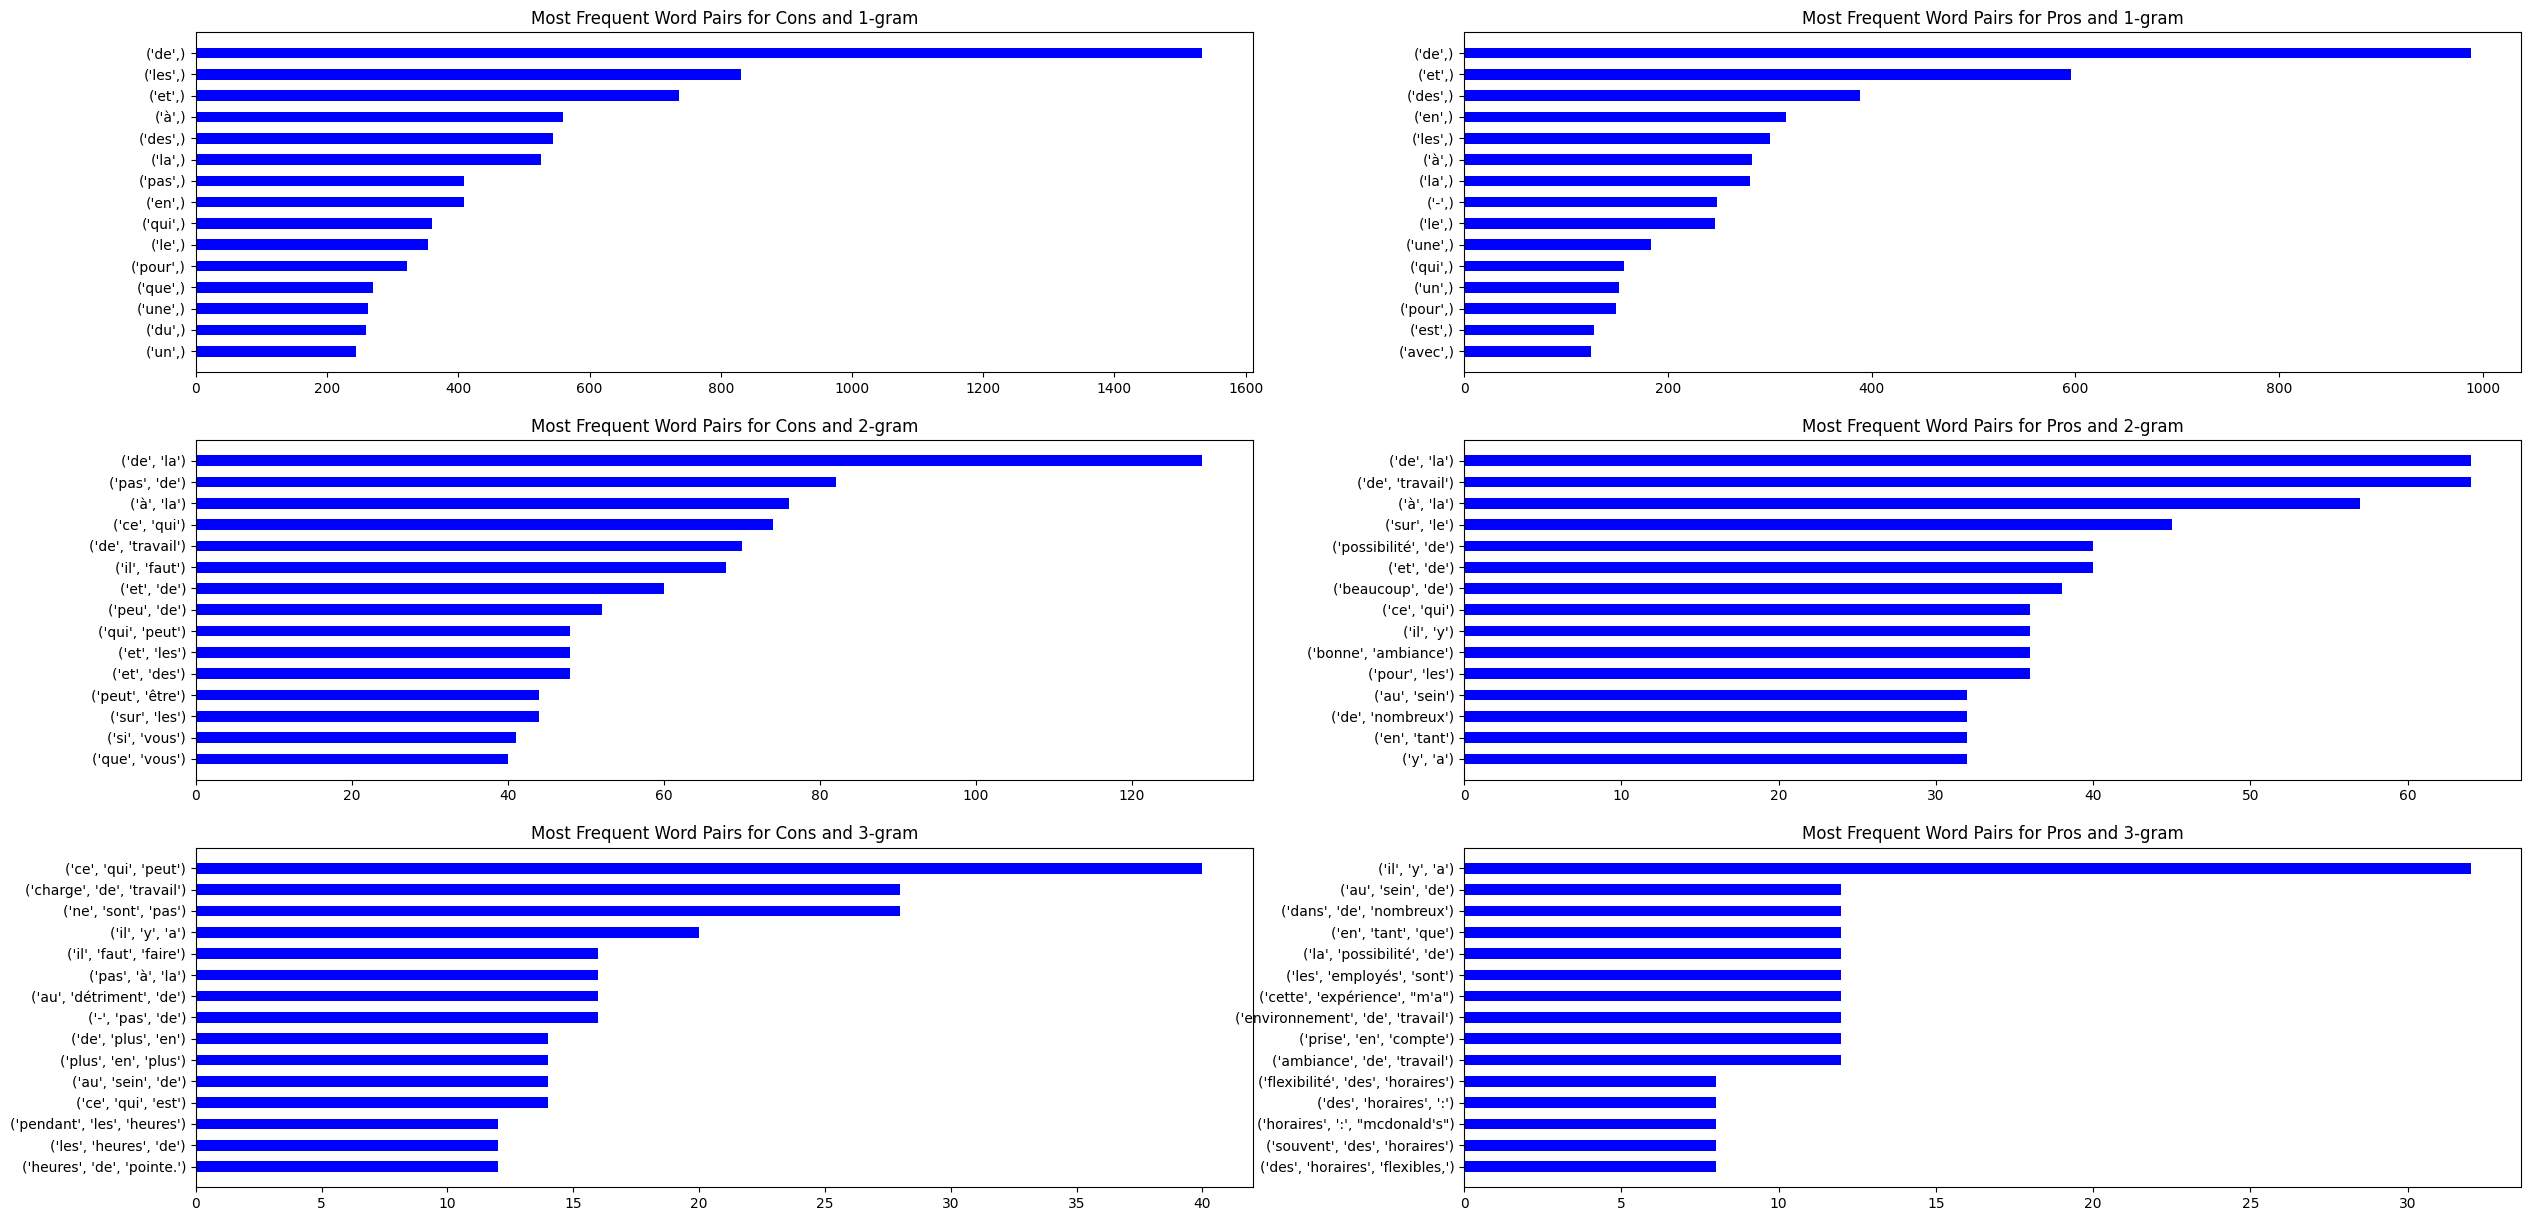

In [94]:
fig, ax = plt.subplots(3,2, figsize=[30,15])

for n_grams, tag in zip(big_n_grams, ["Pros", "Cons"]):
    # List of list
    for n, n_gram in enumerate(n_grams):
        # list of pairs
        #print(n_gram)
        word_pair_counts = {}
        for pair in n_gram:
            if pair in word_pair_counts:
                word_pair_counts[pair] += 1
            else:
                word_pair_counts[pair] = 1

        # Get the most common pairs based on frequency
        most_common_pairs = sorted(word_pair_counts.items(), key=lambda x: x[1], reverse=True)[:15]

        # Separate the pairs and their frequencies
        pairs, frequencies = zip(*most_common_pairs)
        
        # Plot the bar plot
        y = 1 if tag=="Pros" else 0
        x = n
        
        pairs = [str(pair) for pair in pairs[::-1]]
        frequencies = list(frequencies[::-1])
        
        #print(len(word_pair_counts.keys()), "n:", n+1, x, y, tag, len(pairs), len(frequencies), pairs, frequencies)
        ax[x,y].barh(y=pairs, width=frequencies, height=0.5, color="blue")
        #ax[x,y].set_ylabel('Word Pairs')
        #ax[x,y].set_xlabel('Frequency')
        ax[x,y].set_title(f'Most Frequent Word Pairs for {tag} and {n+1}-gram')
        #ax[x,y].set_xticks(ticks=,rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

Pour les pros, on remarque certains mots faciles à identifier :
* Bonne / ambiance

Mais cela représente peu les mots présents

D'un autre côté, les mots négatifs permettent très facilement d'identifier le sentiment d'un commentaire
* Peut-être (indécis)
* Peut (amélioration potentielle)
* Ne

**Nous n'avons que 400 commentaires**. Les commentaires font en moyenne 14 mots.

In [103]:
import pandas as pd
df = pd.read_csv("NLP_reviews_data.csv")
df = df.fillna("")
a = [len(sentence.split()) for sentence in df["Pros"].values.tolist() if len(sentence.split()) >= 12]
a2 = [len(sentence.split()) for sentence in df["Pros"].values.tolist() if len(sentence.split()) > 15]
print("Moyenne de pros:", sum(a)/len(a))
print("% de comms > len 16 :", len(a2)/len(a))
b = [len(sentence.split()) for sentence in df["Cons"].values.tolist() if len(sentence.split()) >= 12]    
b2 = [len(sentence.split()) for sentence in df["Pros"].values.tolist() if len(sentence.split()) > 15]
print("Moyenne de cons:", sum(a)/len(a))
print("% de comms > len 16 :", len(b2)/len(b))

Moyenne de pros: 33.91382765531062
% de comms > len 16 : 0.7394789579158316
Moyenne de cons: 33.91382765531062
% de comms > len 16 : 0.738


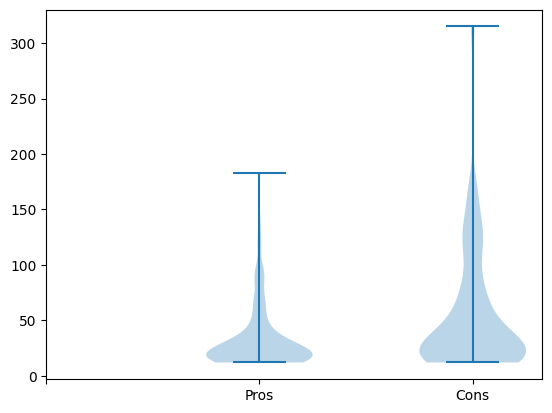

In [104]:
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.violinplot([a,b])
labels=["Pros", "Cons"]
ax.set_xticks(range(len(labels)+1), labels=["", "Pros", "Cons"])

### Data cleaning

Our Data is clean, however, we can check the reviews that have no tag. We aim to add a tag for the unlabelled comments by training a model with the comments already tagged. Sometimes, a tag isn't really depicted in the comment and it might be helpful adding some more data to get a bertter model

In [25]:
columns = ["Recommandation","Approb CEO","Perspective"]
for colonne in columns:
    percent_unlabel = df[df[colonne].isna()].shape[0] / df.shape[0]
    print(f"{colonne} || % de None : {percent_unlabel}")


percent_unlabel = df[(df["Recommandation"].notna())&(df["Approb CEO"].notna())&(df["Perspective"].notna())].shape[0] / df.shape[0]
print(f"Number of comments with all tags : {percent_unlabel}")
percent_unlabel = df[(df["Recommandation"].isna())&(df["Approb CEO"].isna())&(df["Perspective"].isna())].shape[0] / df.shape[0]
print(f"Number of comments with 0 tags : {percent_unlabel}")

Recommandation || % de None : 0.3125
Approb CEO || % de None : 0.4375
Perspective || % de None : 0.3575
Number of comments with all tags : 0.5375
Number of comments with 0 tags : 0.3


### Correct sentences in english

In [44]:
from happytransformer import HappyTextToText, TTSettings
happy_tt = HappyTextToText("T5", "PoloHuggingface/French_grammar_error_corrector")

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

01/19/2024 18:22:00 - INFO - happytransformer.happy_transformer -   Using device: cpu


### Very long

In [31]:
args = TTSettings(num_beams=5, min_length=1)

pros_en_clean = [happy_tt.generate_text(sentence, args=args).text
                 for sentence in pros_en]

cons_en_clean = [happy_tt.generate_text(sentence, args=args).text
                 for sentence in cons_en]

df_clean = df.copy()

df_clean["Pros"] = pros_en_clean
df_clean["Cons"] = cons_en_clean

In [32]:
df_clean.to_csv("clean_NLP_reviews_data.csv")

### Normal

In [4]:
df_clean_2 = pd.read_csv("clean_NLP_reviews_data.csv")

In [27]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 
warnings.filterwarnings(action='ignore')
 
data = []

f = ". ".join(df_clean_2["Pros"].values.tolist())
f += ". ".join(df_clean_2["Cons"].values.tolist())

# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
 
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
 
    data.append(temp)

TextToTextResult(text='Restaurant title paid leave atmosphere.'). TextToTextResult(text="McDonald's often offers flexible schedules, which may suit students, part-time workers, or those with personal commitments. Advancement Opportunities: McDonald's often encourages internal promotion, providing employees with the opportunity to advance their careers within"). TextToTextResult(text='Being versatile, you will learn several functions, whether in the kitchen, at the counter, at the cash register or managing drive-thru orders. Adaptability: Working in different roles builds adaptability, which is a valuable skill'). TextToTextResult(text="Working at McDonald's can give you valuable experience in the fast food industry. you can learn skills in customer service, time management and teamwork. flexible hours: McDonald's often offers flexible hours, which may work for students or those who"). TextToTextResult(text='It is quite easy to get a first job if you are motivated of course. the team is

In [6]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5)
 
# Print results

main_word = 'work'
compare_word_1 = 'charge'
compare_word_2 = 'catch'


print(f"Cosine similarity between '{main_word}' " +
      f"and '{compare_word_1}' - CBOW : ",
      model1.wv.similarity(main_word, compare_word_2))
 
print(f"Cosine similarity between '{main_word}' " +
      f"and '{compare_word_2}' - CBOW : ",
      model1.wv.similarity(main_word, compare_word_2))
 
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)
 
# Print results
print(f"Cosine similarity between '{main_word}' " +
      f"and '{compare_word_1}' - Skip Gram : ",
      model2.wv.similarity(main_word, compare_word_1))
 
print(f"Cosine similarity between '{main_word}' " +
      f"and '{compare_word_2}' - Skip Gram : ",
      model2.wv.similarity(main_word, compare_word_2))

Cosine similarity between 'work' and 'charge' - CBOW :  0.8535415
Cosine similarity between 'work' and 'catch' - CBOW :  0.8535415
Cosine similarity between 'work' and 'charge' - Skip Gram :  0.96234685
Cosine similarity between 'work' and 'catch' - Skip Gram :  0.98315454


In [22]:
model1.wv.key_to_index

{'.': 0,
 '(': 1,
 ')': 2,
 'texttotextresult': 3,
 ',': 4,
 "'": 5,
 'the': 6,
 'and': 7,
 'of': 8,
 'to': 9,
 'a': 10,
 'is': 11,
 'in': 12,
 'are': 13,
 'salary': 14,
 'for': 15,
 'good': 16,
 'management': 17,
 '-': 18,
 "text='the": 19,
 'with': 20,
 'you': 21,
 'no': 22,
 'company': 23,
 'on': 24,
 'work': 25,
 'very': 26,
 'not': 27,
 'atmosphere': 28,
 'text=': 29,
 'it': 30,
 'have': 31,
 'working': 32,
 "''": 33,
 'environment': 34,
 'low': 35,
 'that': 36,
 'at': 37,
 'race': 38,
 'be': 39,
 'which': 40,
 'or': 41,
 'missions': 42,
 'benefits': 43,
 'training': 44,
 'i': 45,
 'but': 46,
 'team': 47,
 'can': 48,
 'too': 49,
 '``': 50,
 'an': 51,
 'this': 52,
 "'s": 53,
 'internal': 54,
 'mobility': 55,
 'do': 56,
 'pressure': 57,
 'projects': 58,
 'hours': 59,
 'from': 60,
 '/': 61,
 'project': 62,
 "text='there": 63,
 'interesting': 64,
 "text='very": 65,
 'little': 66,
 "text='no": 67,
 'many': 68,
 'as': 69,
 'there': 70,
 "text='good": 71,
 'teleworking': 72,
 'developmen

In [13]:
### Semantic search

list_of_sentences = df_clean_2["Pros"].values.tolist() + df_clean_2["Cons"].values.tolist()

In [14]:
list_of_sentences = [sentence.replace("')","").replace("TextToTextResult(text='","") for sentence in list_of_sentences]

In [20]:
def similarity_search(word):
    scores = [sum([(sentence, (model1.wv.similarity(word, word__.lower()))) for word__ in sentence.split()])/len(sentence.split()) for sentence in list_of_sentences]
    return sorted(scores, key=lambda x: x[1], reverse=True)[0]

In [21]:
similarity_search("work")

KeyError: "Key 'atmosphere.' not present"

In [96]:
import numpy as np
from sklearn.decomposition import PCA
def display_pca_scatterplot(model, words=None, sample=0, dim=3):
    if words == None:
        if sample > 0:
            words = np.random.choice(model.wv.index_to_key, sample)
        else:
            words = [ word for word in model.wv.index_to_key ]
        
    word_vectors = np.array([model.wv[w] for w in words])

    dims = PCA(n_components=dim).fit_transform(word_vectors)
    
    if dim == 2 : dims=dims[:,:2]
    
    fig = plt.figure(figsize=(6,6))
    proj = None if dim == 2 else '3d'
    ax = fig.add_subplot(projection=proj)
    
    if dim == 3:
        ax.scatter(dims[:,0], dims[:,1], dims[:,2], edgecolors='k', c='r')
        for word, (x,y,z) in zip(words, dims):
            ax.text(x+0.001, y+0.001, z+0.001, word)
    if dim == 2:
        ax.scatter(dims[:,0], dims[:,1], edgecolors='k', c='r')
        for word, (x,y) in zip(words, dims):
            ax.text(x+0.001, y+0.001, word)
    fig.show()

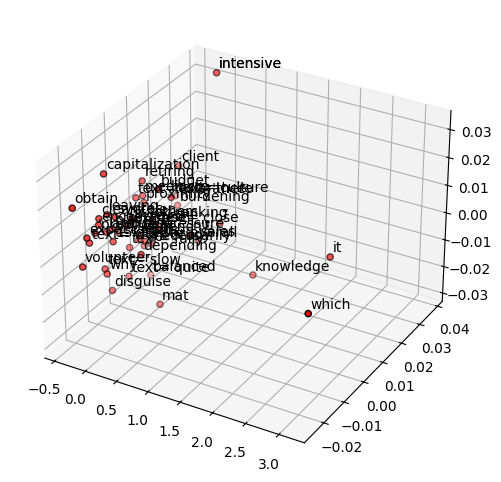

In [98]:
display_pca_scatterplot(model1, sample=50, dim=3)